#####Created on 24-April-2020 -- By Naganandini Subbaraja#####

### Analysis of Role of Activation Functions (Tanh, ReLU) and Pooling Techniques

This is a naive attempt to understand the impact of Activation Functions, Pooling Techniques, number of Epochs in LeNet-5. 

4 different combinations has been used. Namely:
1. Tanh Activation function with Average Pooling
2. Tanh Activation function with Max Pooling
3. ReLU Activation function with Average Pooling
4. ReLU Activation function with Max Pooling

**NOTE1:** LeNet-5, from the paper Gradient-Based Learning Applied to Document Recognition, is a very efficient convolutional neural network for handwritten character recognition. You may find the paper here:
<a href="http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf" target="_blank">Paper: <u>Gradient-Based Learning Applied to Document Recognition</u></a>
**Authors**: Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner
**Published in**: Proceedings of the IEEE (1998)

**NOTE2:** The dataset taken here is very small in the context of Deep Learning. 
My intention was NOT to use any standard pre-processed data so that I can comprehend the concepts a little better :)

I have a folder named **dataset_train.** In this I have three different folders (named as gaanu, chubby, dyutith -- Names of children) maintained for 3 different classes which has around 10 images(of children) in each of these folders.

One can surely try with various other datasets, tweak the code a little here and there.... and share the results!!! 

In [3]:
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)

2.0.0
2.3.1


In [6]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.utils import shuffle

In [7]:
#Define the path of the dataset
path = 'C:/Users/Naganandini/Nandu/DEEP learning/Advanced CNN/LeNet/dataset_train'
data_dir_list = os.listdir(path)

In [8]:
# Define the number of classes
num_classes = 3
labels_name={'gaanu':0,'chubby':1,'dyutith':2}
img_data_list=[]
labels_list = []

#Load the dataset from the directories
for dataset in data_dir_list:
	img_list=os.listdir(path+'/'+ dataset)
	print ('Loading the images of dataset-'+'{}\n'.format(dataset))
	label = labels_name[dataset]
	for img in img_list:
		input_img=cv2.imread(path + '/'+ dataset + '/'+ img )
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)
		labels_list.append(label)

Loading the images of dataset-chubby

Loading the images of dataset-dyutith

Loading the images of dataset-gaanu



In [31]:
#Change the image data and labels data to ndarray
img_data = np.array(img_data_list)
print('img_data.shape')
print(img_data.shape)
labels = np.array(labels_list)
print("Labels:")
print(labels)
print("The count of number of samples for different classes:")
print(np.unique(labels,return_counts=True))
# convert class labels to one-hot encoding
Y = keras.utils.to_categorical(labels, 3)
print('After one-hot encoding:', Y)

img_data.shape
(36, 128, 128, 3)
Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
The count of number of samples for different classes:
(array([0, 1, 2]), array([13, 13, 10], dtype=int64))
After one-hot encoding: [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [12]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)
# Normalization
x_train = x_train / 255
x_test = x_test / 255

In [13]:
# Defining the input shape for the model
input_shape=img_data[0].shape
input_shape

(128, 128, 3)

In [14]:
#Building the model:
# This is the basic LeNET model with ACTIVATION function as TANH and AveragePooling2D
# Step 1 - Convolution
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape))
# Step 2 - Pooling
model.add(AveragePooling2D(pool_size=(2, 2)))
# Step 3 - Adding a second convolutional layer with pooling 
model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model.add(AveragePooling2D(pool_size = (2, 2)))
# Step 4 - Flattening
model.add(Flatten())
# Step 5 - Full connection
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
# Step 6 - Final Layer for classification
model.add(Dense(3, activation='softmax'))
# Defining Metrics for measuring the model behaviour
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Training
num_epoch=200
hist = model.fit(x_train, y_train, batch_size=32, epochs= num_epoch, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Train on 28 samples, validate on 8 samples
Epoch 1/200
28/28 [==============================] - 1s 27ms/step - loss: 1.1332 - accuracy: 0.3571 - val_loss: 4.8241 - val_accuracy: 0.2500
Epoch 2/200
28/28 [==============================] - 0s 15ms/step - loss: 4.1933 - accuracy: 0.3929 - val_loss: 3.6980 - val_accuracy: 0.2500
Epoch 3/200
28/28 [==============================] - 0s 15ms/step - loss: 3.3133 - accuracy: 0.3929 - val_loss: 2.7148 - val_accuracy: 0.2500
Epoch 4/200
28/28 [==============================] - 0s 16ms/step - loss: 2.5851 - accuracy: 0.3929 - val_loss: 2.1734 - val_accuracy: 0.2500
Epoch 5/200
28/28 [==============================] - 0s 17ms/step - loss: 2.2701 - accuracy: 0.4286 - val_loss: 1.9708 - val_accuracy: 0.5000
Epoch 6/200
28/28 [==============================] - 0s 17ms/step - loss: 2.2226 - accuracy: 0.3214 - val_loss: 1.7777 - val_accuracy: 0.5000
Epoch 7/200
28/28 [==============================] - 0s 18ms/step - loss: 1.9734 - accuracy: 0.3214 - val

28/28 [==============================] - 0s 14ms/step - loss: 0.0715 - accuracy: 1.0000 - val_loss: 0.8818 - val_accuracy: 0.6250
Epoch 59/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0676 - accuracy: 1.0000 - val_loss: 0.8913 - val_accuracy: 0.6250
Epoch 60/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0641 - accuracy: 1.0000 - val_loss: 0.8973 - val_accuracy: 0.6250
Epoch 61/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0607 - accuracy: 1.0000 - val_loss: 0.9003 - val_accuracy: 0.6250
Epoch 62/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0576 - accuracy: 1.0000 - val_loss: 0.9017 - val_accuracy: 0.6250
Epoch 63/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.9027 - val_accuracy: 0.6250
Epoch 64/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0518 - accuracy: 1.0000 - val_loss: 0.9045 - val_accuracy: 0.6250
Epoch 65/200

Epoch 116/200
28/28 [==============================] - 1s 20ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 1.1444 - val_accuracy: 0.6250
Epoch 117/200
28/28 [==============================] - 0s 17ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 1.1466 - val_accuracy: 0.6250
Epoch 118/200
28/28 [==============================] - 1s 18ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.1486 - val_accuracy: 0.6250
Epoch 119/200
28/28 [==============================] - 0s 17ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 1.1504 - val_accuracy: 0.6250
Epoch 120/200
28/28 [==============================] - 0s 17ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 1.1520 - val_accuracy: 0.6250
Epoch 121/200
28/28 [==============================] - 0s 16ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 1.1534 - val_accuracy: 0.6250
Epoch 122/200
28/28 [==============================] - 0s 16ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 1.1547 - val_accuracy:

Epoch 173/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.2317 - val_accuracy: 0.6250
Epoch 174/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.2332 - val_accuracy: 0.6250
Epoch 175/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.2346 - val_accuracy: 0.6250
Epoch 176/200
28/28 [==============================] - 0s 18ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.2360 - val_accuracy: 0.6250
Epoch 177/200
28/28 [==============================] - 0s 18ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.2375 - val_accuracy: 0.6250
Epoch 178/200
28/28 [==============================] - 1s 19ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.2389 - val_accuracy: 0.6250
Epoch 179/200
28/28 [==============================] - 1s 18ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.2403 - val_accuracy:

In [15]:
#Building the model:
# This is the basic LeNET model with ACTIVATION function as TANH and POOLING as MAXPOOLING2D
model1 = Sequential()
model1.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Flatten())
model1.add(Dense(120, activation='tanh'))
model1.add(Dense(84, activation='tanh'))
model1.add(Dense(3, activation='softmax'))
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Training
num_epoch=200
hist1 = model1.fit(x_train, y_train, batch_size=32, epochs= num_epoch, verbose=1, validation_data=(x_test, y_test))
score1 = model1.evaluate(x_test, y_test)
print('Test Loss:', score1[0])
print('Test accuracy:', score1[1])

Train on 28 samples, validate on 8 samples
Epoch 1/200
28/28 [==============================] - 1s 22ms/step - loss: 1.0899 - accuracy: 0.4286 - val_loss: 6.3924 - val_accuracy: 0.2500
Epoch 2/200
28/28 [==============================] - 0s 16ms/step - loss: 4.9547 - accuracy: 0.3929 - val_loss: 4.8185 - val_accuracy: 0.2500
Epoch 3/200
28/28 [==============================] - 0s 15ms/step - loss: 3.4250 - accuracy: 0.3929 - val_loss: 3.0275 - val_accuracy: 0.3750
Epoch 4/200
28/28 [==============================] - 0s 15ms/step - loss: 1.9527 - accuracy: 0.6429 - val_loss: 2.3171 - val_accuracy: 0.2500
Epoch 5/200
28/28 [==============================] - 0s 15ms/step - loss: 1.5995 - accuracy: 0.2857 - val_loss: 1.3650 - val_accuracy: 0.3750
Epoch 6/200
28/28 [==============================] - 0s 15ms/step - loss: 0.9152 - accuracy: 0.5714 - val_loss: 0.8723 - val_accuracy: 0.6250
Epoch 7/200
28/28 [==============================] - 0s 15ms/step - loss: 0.6146 - accuracy: 0.8571 - val

28/28 [==============================] - 0s 15ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6577 - val_accuracy: 0.8750
Epoch 59/200
28/28 [==============================] - 0s 16ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.6582 - val_accuracy: 0.8750
Epoch 60/200
28/28 [==============================] - 0s 18ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.6586 - val_accuracy: 0.8750
Epoch 61/200
28/28 [==============================] - 0s 17ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6595 - val_accuracy: 0.8750
Epoch 62/200
28/28 [==============================] - 0s 17ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6610 - val_accuracy: 0.8750
Epoch 63/200
28/28 [==============================] - 0s 17ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6634 - val_accuracy: 0.8750
Epoch 64/200
28/28 [==============================] - 0s 16ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6668 - val_accuracy: 0.8750
Epoch 65/200

Epoch 116/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.6952 - val_accuracy: 0.8750
Epoch 117/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.6955 - val_accuracy: 0.7500
Epoch 118/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6959 - val_accuracy: 0.7500
Epoch 119/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6964 - val_accuracy: 0.7500
Epoch 120/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6970 - val_accuracy: 0.7500
Epoch 121/200
28/28 [==============================] - 0s 15ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6976 - val_accuracy: 0.7500
Epoch 122/200
28/28 [==============================] - 0s 14ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6982 - val_accuracy:

Epoch 172/200
28/28 [==============================] - 0s 14ms/step - loss: 7.9437e-04 - accuracy: 1.0000 - val_loss: 0.7242 - val_accuracy: 0.7500
Epoch 173/200
28/28 [==============================] - 1s 18ms/step - loss: 7.8973e-04 - accuracy: 1.0000 - val_loss: 0.7246 - val_accuracy: 0.7500
Epoch 174/200
28/28 [==============================] - 0s 18ms/step - loss: 7.8511e-04 - accuracy: 1.0000 - val_loss: 0.7250 - val_accuracy: 0.7500
Epoch 175/200
28/28 [==============================] - 0s 17ms/step - loss: 7.8057e-04 - accuracy: 1.0000 - val_loss: 0.7254 - val_accuracy: 0.7500
Epoch 176/200
28/28 [==============================] - 0s 17ms/step - loss: 7.7607e-04 - accuracy: 1.0000 - val_loss: 0.7258 - val_accuracy: 0.7500
Epoch 177/200
28/28 [==============================] - 0s 17ms/step - loss: 7.7162e-04 - accuracy: 1.0000 - val_loss: 0.7262 - val_accuracy: 0.7500
Epoch 178/200
28/28 [==============================] - 0s 15ms/step - loss: 7.6720e-04 - accuracy: 1.0000 - val_

In [16]:
# This is the basic LeNET model with ACTIVATION function as RELU and AveragePooling2D
model2 = Sequential()
model2.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model2.add(AveragePooling2D(pool_size=(2, 2)))
model2.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model2.add(AveragePooling2D(pool_size = (2, 2)))
model2.add(Flatten())
model2.add(Dense(120, activation='relu'))
model2.add(Dense(84, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Training
num_epoch=200
hist2 = model2.fit(x_train, y_train, batch_size=32, epochs= num_epoch, verbose=1, validation_data=(x_test, y_test))
score2 = model2.evaluate(x_test, y_test)
print('Test Loss:', score2[0])
print('Test accuracy:', score2[1])

Train on 28 samples, validate on 8 samples
Epoch 1/200
28/28 [==============================] - 1s 23ms/step - loss: 1.0995 - accuracy: 0.2857 - val_loss: 2.5314 - val_accuracy: 0.2500
Epoch 2/200
28/28 [==============================] - 0s 14ms/step - loss: 1.7598 - accuracy: 0.3929 - val_loss: 1.1381 - val_accuracy: 0.6250
Epoch 3/200
28/28 [==============================] - 0s 14ms/step - loss: 1.2648 - accuracy: 0.5000 - val_loss: 0.9913 - val_accuracy: 0.5000
Epoch 4/200
28/28 [==============================] - 0s 14ms/step - loss: 1.0980 - accuracy: 0.3571 - val_loss: 1.0369 - val_accuracy: 0.3750
Epoch 5/200
28/28 [==============================] - 0s 14ms/step - loss: 0.9405 - accuracy: 0.4643 - val_loss: 1.1831 - val_accuracy: 0.2500
Epoch 6/200
28/28 [==============================] - 0s 14ms/step - loss: 0.9372 - accuracy: 0.3929 - val_loss: 1.1290 - val_accuracy: 0.2500
Epoch 7/200
28/28 [==============================] - 0s 14ms/step - loss: 0.8679 - accuracy: 0.4643 - val

Epoch 58/200
28/28 [==============================] - 0s 16ms/step - loss: 1.7566e-05 - accuracy: 1.0000 - val_loss: 1.2183 - val_accuracy: 0.7500
Epoch 59/200
28/28 [==============================] - 0s 14ms/step - loss: 1.5986e-05 - accuracy: 1.0000 - val_loss: 1.2264 - val_accuracy: 0.7500
Epoch 60/200
28/28 [==============================] - 0s 14ms/step - loss: 1.4615e-05 - accuracy: 1.0000 - val_loss: 1.2339 - val_accuracy: 0.7500
Epoch 61/200
28/28 [==============================] - 0s 14ms/step - loss: 1.3428e-05 - accuracy: 1.0000 - val_loss: 1.2409 - val_accuracy: 0.7500
Epoch 62/200
28/28 [==============================] - 0s 14ms/step - loss: 1.2393e-05 - accuracy: 1.0000 - val_loss: 1.2473 - val_accuracy: 0.7500
Epoch 63/200
28/28 [==============================] - 0s 14ms/step - loss: 1.1533e-05 - accuracy: 1.0000 - val_loss: 1.2533 - val_accuracy: 0.7500
Epoch 64/200
28/28 [==============================] - 0s 14ms/step - loss: 1.0814e-05 - accuracy: 1.0000 - val_loss: 1

Epoch 114/200
28/28 [==============================] - 0s 14ms/step - loss: 6.2329e-06 - accuracy: 1.0000 - val_loss: 1.3370 - val_accuracy: 0.6250
Epoch 115/200
28/28 [==============================] - 0s 14ms/step - loss: 6.2073e-06 - accuracy: 1.0000 - val_loss: 1.3374 - val_accuracy: 0.6250
Epoch 116/200
28/28 [==============================] - 0s 14ms/step - loss: 6.1946e-06 - accuracy: 1.0000 - val_loss: 1.3377 - val_accuracy: 0.6250
Epoch 117/200
28/28 [==============================] - 0s 14ms/step - loss: 6.1775e-06 - accuracy: 1.0000 - val_loss: 1.3380 - val_accuracy: 0.6250
Epoch 118/200
28/28 [==============================] - 0s 14ms/step - loss: 6.1605e-06 - accuracy: 1.0000 - val_loss: 1.3384 - val_accuracy: 0.6250
Epoch 119/200
28/28 [==============================] - 0s 14ms/step - loss: 6.1392e-06 - accuracy: 1.0000 - val_loss: 1.3387 - val_accuracy: 0.6250
Epoch 120/200
28/28 [==============================] - 0s 14ms/step - loss: 6.1179e-06 - accuracy: 1.0000 - val_

Epoch 170/200
28/28 [==============================] - 0s 17ms/step - loss: 5.3048e-06 - accuracy: 1.0000 - val_loss: 1.3493 - val_accuracy: 0.6250
Epoch 171/200
28/28 [==============================] - 0s 16ms/step - loss: 5.2877e-06 - accuracy: 1.0000 - val_loss: 1.3495 - val_accuracy: 0.6250
Epoch 172/200
28/28 [==============================] - 0s 17ms/step - loss: 5.2792e-06 - accuracy: 1.0000 - val_loss: 1.3496 - val_accuracy: 0.6250
Epoch 173/200
28/28 [==============================] - 0s 14ms/step - loss: 5.2537e-06 - accuracy: 1.0000 - val_loss: 1.3498 - val_accuracy: 0.7500
Epoch 174/200
28/28 [==============================] - 0s 14ms/step - loss: 5.2494e-06 - accuracy: 1.0000 - val_loss: 1.3499 - val_accuracy: 0.7500
Epoch 175/200
28/28 [==============================] - 0s 15ms/step - loss: 5.2324e-06 - accuracy: 1.0000 - val_loss: 1.3501 - val_accuracy: 0.7500
Epoch 176/200
28/28 [==============================] - 0s 14ms/step - loss: 5.2239e-06 - accuracy: 1.0000 - val_

In [18]:
# This is the basic LeNET model with ACTIVATION function as RELU and POOLING as MAXPOOLING2D
model3 = Sequential()
model3.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Flatten())
model3.add(Dense(120, activation='relu'))
model3.add(Dense(84, activation='relu'))
model3.add(Dense(3, activation='softmax'))
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Training
num_epoch=200
hist3 = model3.fit(x_train, y_train, batch_size=32, epochs= num_epoch, verbose=1, validation_data=(x_test, y_test))
score3 = model3.evaluate(x_test, y_test)
print('Test Loss:', score3[0])
print('Test accuracy:', score3[1])

Train on 28 samples, validate on 8 samples
Epoch 1/200
28/28 [==============================] - 1s 25ms/step - loss: 1.0894 - accuracy: 0.4286 - val_loss: 1.0287 - val_accuracy: 0.5000
Epoch 2/200
28/28 [==============================] - 0s 15ms/step - loss: 0.9972 - accuracy: 0.6429 - val_loss: 1.1544 - val_accuracy: 0.2500
Epoch 3/200
28/28 [==============================] - 0s 15ms/step - loss: 0.8241 - accuracy: 0.6071 - val_loss: 1.0473 - val_accuracy: 0.2500
Epoch 4/200
28/28 [==============================] - 0s 15ms/step - loss: 0.8671 - accuracy: 0.6071 - val_loss: 0.9913 - val_accuracy: 0.5000
Epoch 5/200
28/28 [==============================] - 0s 15ms/step - loss: 0.5781 - accuracy: 0.9286 - val_loss: 1.2370 - val_accuracy: 0.2500
Epoch 6/200
28/28 [==============================] - 0s 15ms/step - loss: 0.5668 - accuracy: 0.7857 - val_loss: 0.8906 - val_accuracy: 0.5000
Epoch 7/200
28/28 [==============================] - 0s 14ms/step - loss: 0.3747 - accuracy: 0.9643 - val

Epoch 58/200
28/28 [==============================] - 1s 20ms/step - loss: 3.1931e-06 - accuracy: 1.0000 - val_loss: 3.9446 - val_accuracy: 0.5000
Epoch 59/200
28/28 [==============================] - 0s 17ms/step - loss: 3.0654e-06 - accuracy: 1.0000 - val_loss: 3.9648 - val_accuracy: 0.5000
Epoch 60/200
28/28 [==============================] - 0s 16ms/step - loss: 2.9589e-06 - accuracy: 1.0000 - val_loss: 3.9831 - val_accuracy: 0.5000
Epoch 61/200
28/28 [==============================] - 0s 15ms/step - loss: 2.8653e-06 - accuracy: 1.0000 - val_loss: 3.9998 - val_accuracy: 0.5000
Epoch 62/200
28/28 [==============================] - 0s 15ms/step - loss: 2.7886e-06 - accuracy: 1.0000 - val_loss: 4.0148 - val_accuracy: 0.5000
Epoch 63/200
28/28 [==============================] - 0s 14ms/step - loss: 2.7290e-06 - accuracy: 1.0000 - val_loss: 4.0282 - val_accuracy: 0.5000
Epoch 64/200
28/28 [==============================] - 0s 17ms/step - loss: 2.6737e-06 - accuracy: 1.0000 - val_loss: 4

Epoch 114/200
28/28 [==============================] - 0s 15ms/step - loss: 1.6860e-06 - accuracy: 1.0000 - val_loss: 4.0496 - val_accuracy: 0.5000
Epoch 115/200
28/28 [==============================] - 0s 15ms/step - loss: 1.6860e-06 - accuracy: 1.0000 - val_loss: 4.0482 - val_accuracy: 0.5000
Epoch 116/200
28/28 [==============================] - 0s 15ms/step - loss: 1.6774e-06 - accuracy: 1.0000 - val_loss: 4.0467 - val_accuracy: 0.5000
Epoch 117/200
28/28 [==============================] - 0s 17ms/step - loss: 1.6774e-06 - accuracy: 1.0000 - val_loss: 4.0454 - val_accuracy: 0.5000
Epoch 118/200
28/28 [==============================] - 0s 16ms/step - loss: 1.6689e-06 - accuracy: 1.0000 - val_loss: 4.0441 - val_accuracy: 0.5000
Epoch 119/200
28/28 [==============================] - 0s 16ms/step - loss: 1.6689e-06 - accuracy: 1.0000 - val_loss: 4.0428 - val_accuracy: 0.5000
Epoch 120/200
28/28 [==============================] - 0s 15ms/step - loss: 1.6604e-06 - accuracy: 1.0000 - val_

Epoch 170/200
28/28 [==============================] - 1s 19ms/step - loss: 1.4731e-06 - accuracy: 1.0000 - val_loss: 4.0143 - val_accuracy: 0.5000
Epoch 171/200
28/28 [==============================] - 1s 18ms/step - loss: 1.4688e-06 - accuracy: 1.0000 - val_loss: 4.0141 - val_accuracy: 0.5000
Epoch 172/200
28/28 [==============================] - 1s 18ms/step - loss: 1.4646e-06 - accuracy: 1.0000 - val_loss: 4.0140 - val_accuracy: 0.5000
Epoch 173/200
28/28 [==============================] - 0s 16ms/step - loss: 1.4646e-06 - accuracy: 1.0000 - val_loss: 4.0137 - val_accuracy: 0.5000
Epoch 174/200
28/28 [==============================] - 1s 19ms/step - loss: 1.4646e-06 - accuracy: 1.0000 - val_loss: 4.0133 - val_accuracy: 0.5000
Epoch 175/200
28/28 [==============================] - 0s 17ms/step - loss: 1.4603e-06 - accuracy: 1.0000 - val_loss: 4.0131 - val_accuracy: 0.5000
Epoch 176/200
28/28 [==============================] - 0s 16ms/step - loss: 1.4603e-06 - accuracy: 1.0000 - val_

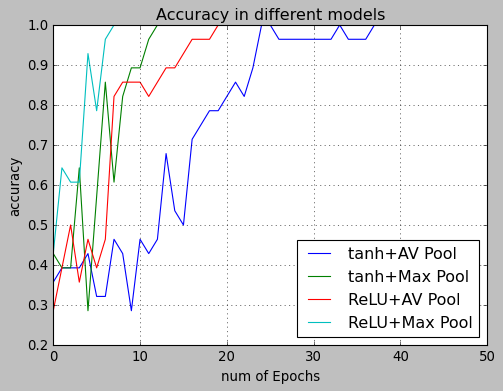

In [30]:
#Print the observations of Accuracy among different models
xc=range(50)
acc0=hist.history['accuracy']
acc1=hist1.history['accuracy']
acc2=hist2.history['accuracy']
acc3=hist3.history['accuracy']
plt.figure(2,figsize=(7,5))
plt.plot(xc,acc0[0:50])
plt.plot(xc,acc1[0:50])
plt.plot(xc,acc2[0:50])
plt.plot(xc,acc3[0:50])
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('Accuracy in different models')
plt.grid(True)
plt.legend(['tanh+AV Pool','tanh+Max Pool','ReLU+AV Pool','ReLU+Max Pool'],loc=4)
plt.style.use(['classic'])

**Note:** Number of images taken for the training is very low (28 images). Increasing the dataset might show a different trend.

**Role of ACTIVATION FUNCTIONS in Model Training:**
Here, we observe that the Relu function has achieved maximum accuracy in very less number of epochs. 
Indeed, Relu function helps the model to learn faster, however the accuracy drops is the lowest.

**Role of POOLING in Model Training:**
Also, we can observe that MaxPooling has a considerable impact on the Model Training. Looks like MaxPooling complements the features of Activation Functions. It actually helps to learn faster irrespective of the models. Though tanh function promotes gradual learning, MaxPooling has given it a good push for faster learning! 

**Role of EPOCHS in Model Training:**
The range of Epochs given for model training was from 0-200. Interestingly, all the models have learnt in less than 40 epochs.
Number of epochs definetly plays a role, however, after some optimum number of epochs (here it is around 35), we can surely stop the training thereby optimizing the available resources.
